In [26]:
# importing libraries as needed for exploratory analysis and predictive analysis
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Importing Customer churn data set into Data Frame. 
Performing Statistical Analysis: Check the data and first few rows.


In [14]:
data = pd.read_csv('dataset/churn.csv')
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [15]:
data.head(5)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [16]:
print(data.isnull().sum())


State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64


It seems there are no null or missing values.


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


Look for correlation to ignore some variables that are not useful for the predictive model.
Moreover remove variables like phone number which does not seem useful in this case.

Convert some variables (like Int'l Plan, VMail Plan) from Categorical to numeric

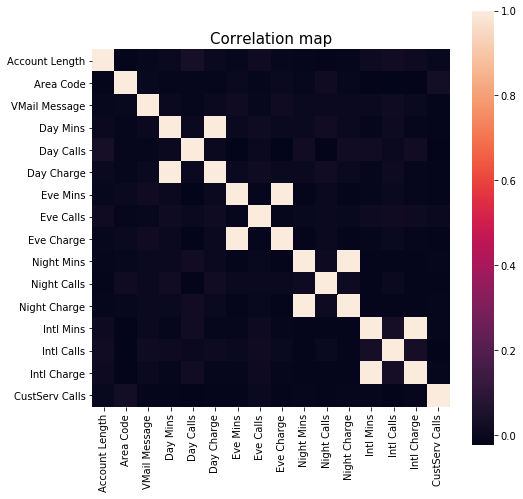

In [18]:
cor=data.corr(method="pearson")

#To change the size of the plot...
plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(cor, vmax=1., square=True)
plt.title("Correlation map", fontsize=15)
plt.show()

There is a high correlation between the Charges and Mins for Day, Evening, Night and intl.
Either Charge or Min is needed, not both. In this case, Charges is removed.
Moreover, 'Phone' can also be removed as it's not important.

Categorial variables will be converted to numeric in next steps.

In [19]:
#Remove columns which are not important
data=data.drop(columns=['Phone','Intl Charge','Night Charge','Eve Charge','Day Charge'])


# converting qualitative variables into numeric.
le = LabelEncoder()
data['VMail Plan']=le.fit_transform(data['VMail Plan'])
data['Int\'l Plan']=le.fit_transform(data['Int\'l Plan'])

Just change the column names a little bit before proceeding further.

In [20]:
data.rename(columns={
'Account Length':'Account_Length',
'Area Code':'Area_Code',
'Int\'l Plan':'Intl Plan',
'VMail Plan':'VMail_Plan',
'VMail Message':'VMail_Message',
'Day Mins':'Day_Mins',
'Day Calls':'Day Calls',         
'Eve Mins':'Eve_Mins',
'Eve Calls':'Eve_Calls',
'Night Mins':'Night_Mins',
'Night Calls':'Night_Calls',
'Intl Mins':'Intl_Mins',
'Intl Calls':'Intl_Calls',
'CustServ Calls':'CustServ_Calls',
'Churn?':'Churn'
},inplace=True)

Check for outliers: create boxplots and check using IQR.

check for class imbalance i.e. Churn column
Apply predictive algos and note the accuracy and other stats.

Suggest the best Algo for this problem.

Apply clustering algo for post-prediction analysis.

Derive conclusions 

Having a look at the histograms below, it can be said the quantitative variable data is mostly normal; except Intl_Calls, CustServ_Calls. We can move to next step without any changes here.

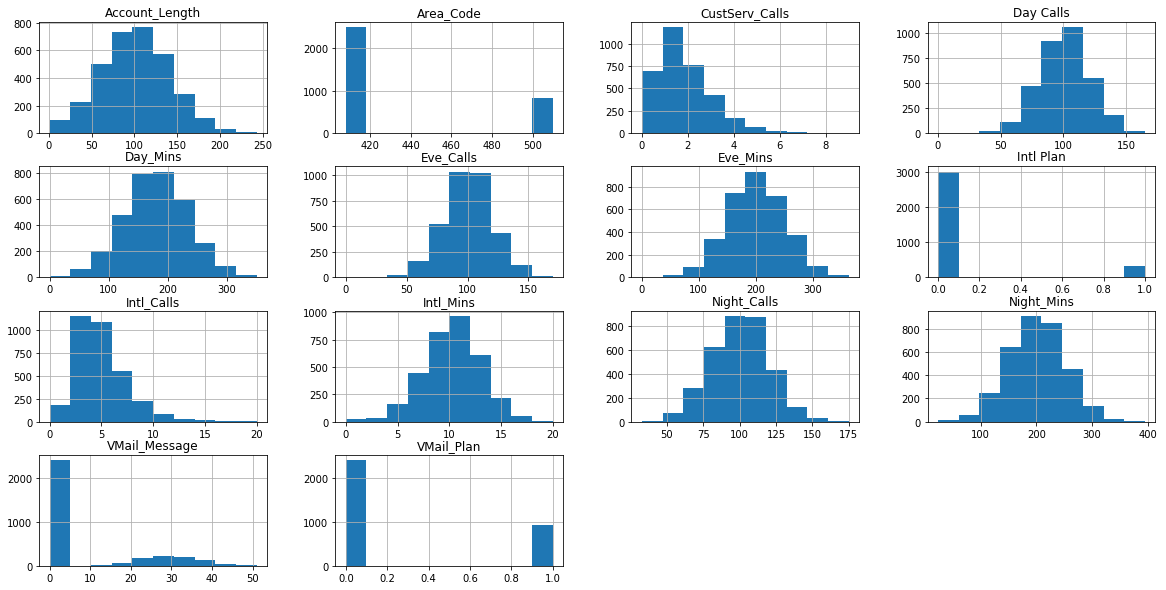

In [21]:
data.hist(column=data.columns)
plt.show()

### Check for outliers
Boxplots are observed as below for all the quantitative variables and it seems to be no outliers in the data set.
The values seem to be in 3*IQR.

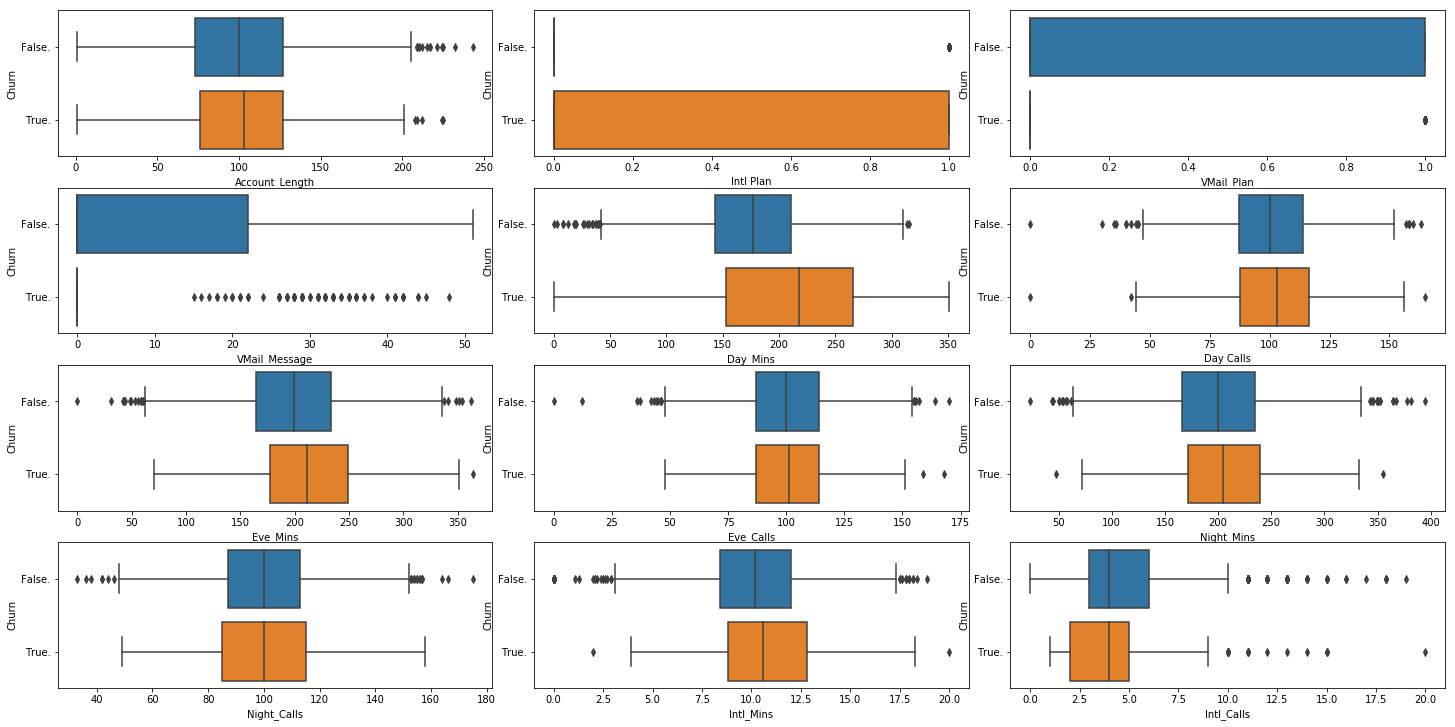

In [29]:
plt.rcParams["figure.figsize"] = (20,10)

fig,*ax=plt.subplots(4,3)
ax=ax.pop()
plt.tight_layout()

col=data.columns
ind=[col[1]]
ind.extend(col[3:14])

i=0
for x in ax.flat:
    sns.boxplot(x=ind[i],data=data, y='Churn',ax=x)
    i+=1

plt.show()
#data.boxplot(column=['Account_Length','CustServ_Calls','Day_Mins', 'Eve_Mins','Night_Mins','Intl_Calls'], by = 'Churn',ax=ax[0])



### Class imbalance

The plot below depicts variable imbalance in the class variable. The 'False' values are way more than 'True' values. This needs to be taken care of before developing any predictive model.

Here .... technique is used.

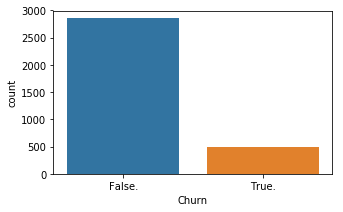

In [24]:
plt.rcParams["figure.figsize"] = (5,3)
sns.countplot(data.Churn)